<a href="https://colab.research.google.com/github/kari-hub/Project-week-two/blob/master/SARAH_WANGARI_WEEK_TWO_IP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory analysis

# 1.0 Univariate analysis

## 1. Defining the Question


 

### a) Specifying the Data Analytic Question

> Which age group has the highest number of bank accounts?






### b) Defining the Metric for Success


### c) Understanding the context


### d) Recording the Experimental Design


### e) Data Relevance

## 2. Reading the Data


In [2]:
# Loading respective datasets and libraries to be used in analysis.
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

finance = pd.read_csv("http://bit.ly/FinancialDataset")
definition = pd.read_csv("http://bit.ly/VariableDefinitions")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



## 3. Checking the Data

In [3]:
# Checking for the number of records in our data
finance.shape


(23524, 13)

In [4]:
# Previewing the top of our dataset 
finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Previewing the bottom of our dataset
finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
# Checking whether our data has appropriate datatypes in each column

finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## Tidying our dataset

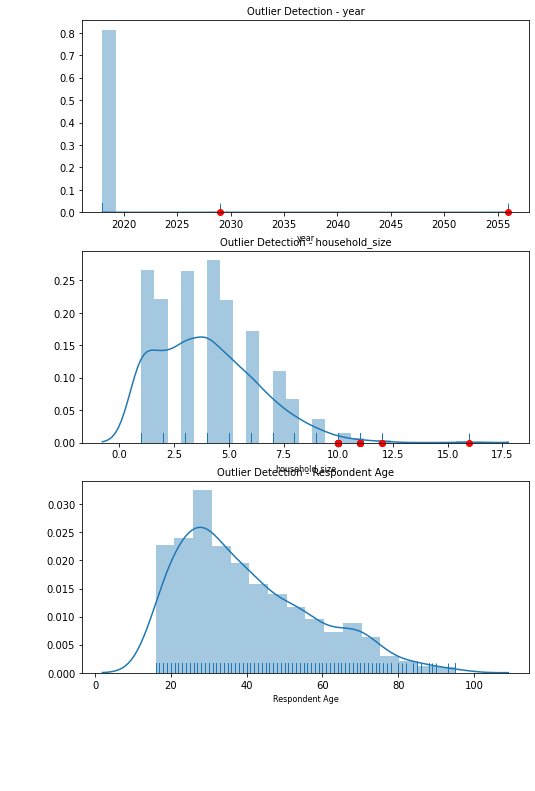

In [7]:
# Checking for anomalies

def percentile_based_outlier(data, threshold=95):
  diff = (100 - threshold)/2
  minval, maxval = np.percentile(data, [diff, 100 - diff])
  return (data < minval) | (data > maxval)

col_names =['year', 'household_size',	'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,12))

for i, col_val in enumerate(col_names):
  x = finance[col_val][:1000]
  sns.distplot(x, ax=ax[i], rug=True, hist=True)
  outliers = x[percentile_based_outlier(x)]
  ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

  ax[i].set_title("Outlier Detection - {}".format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)


In [8]:
# Identifying the missing data

finance.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [9]:
# Dealing with the mising data

finance1 = finance.dropna() 
finance1

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [10]:
# More data cleaning procedures

finance1.isnull().any()

country                   False
year                      False
uniqueid                  False
Has a Bank account        False
Type of Location          False
Cell Phone Access         False
household_size            False
Respondent Age            False
gender_of_respondent      False
The relathip with head    False
marital_status            False
Level of Educuation       False
Type of Job               False
dtype: bool

## Univariate exploratory analysis

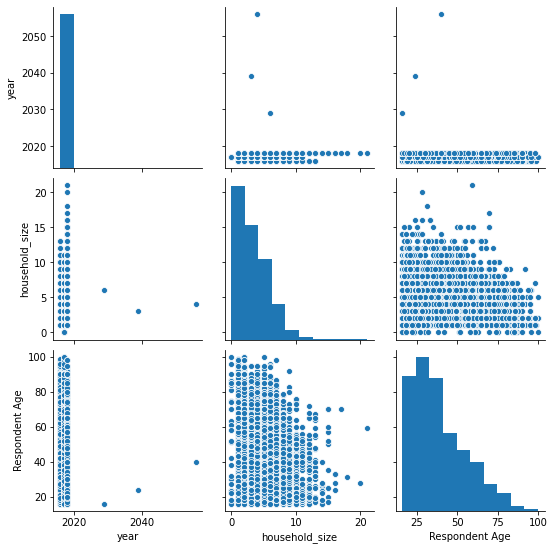

In [11]:
# Plotting the univariate summaries and recording observations

sns.pairplot(finance1)
plt.show()

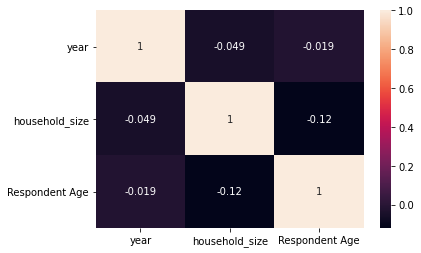

In [12]:
sns.heatmap(finance1.corr(), annot=True)
plt.show()

In [13]:
# Renaming our data columns

finance1.columns = ['Country', 'Year', 'UniqueID', 'Has_A_Bank_Account', 'Type_of_Location', 'Cell_Phone_Access', 'Household_Size', 'Respondent_Age', 'Respondent_Gender', 'Relationship_with_head', 'Marital_Status', 'Education_Level', 'Job_Level']
print(finance1)



      Country  Year  ...                  Education_Level                  Job_Level
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...              Secondary education        

In [16]:
# Finding the frequency tables for our data
print('Country')
print(finance1.Country.value_counts())
print("\n")

print('Year')
print(finance1.Year.value_counts())
print("\n")

print('UniqueID')
print(finance1.UniqueID.value_counts())
print("\n")

print('Has_A_Bank_Account')
print(finance1.Has_A_Bank_Account.value_counts())
print("\n")

print('Type_of_Location')
print(finance1.Type_of_Location.value_counts())
print("\n")

print('Cell_Phone_Access')
print(finance1.Cell_Phone_Access.value_counts())
print("\n")

print('Household_Size')
print(finance1.Household_Size.value_counts())
print("\n")

print('Respondent_Gender')
print(finance1.Respondent_Gender.value_counts())
print("\n")

print('Relationship_with_head')
print(finance1.Relationship_with_head.value_counts())
print("\n")

print('Marital_Status')
print(finance1.Marital_Status.value_counts())
print("\n")

print('Education_Level')
print(finance1.Education_Level.value_counts())
print("\n")

print('Job_Level')
print(finance1.Job_Level.value_counts())
print("\n")

print('Respondent_Age')
print(finance1.Respondent_Age.value_counts())
print("\n")


Country
Rwanda      8684
Tanzania    6500
Kenya       6064
Uganda      2095
Name: Country, dtype: int64


Year
2016    8683
2018    8157
2017    6500
2029       1
2056       1
2039       1
Name: Year, dtype: int64


UniqueID
uniqueid_250     4
uniqueid_594     4
uniqueid_1621    4
uniqueid_1067    4
uniqueid_1106    4
                ..
uniqueid_7448    1
uniqueid_8563    1
uniqueid_8131    1
uniqueid_7121    1
uniqueid_6875    1
Name: UniqueID, Length: 8687, dtype: int64


Has_A_Bank_Account
No     20046
Yes     3297
Name: Has_A_Bank_Account, dtype: int64


Type_of_Location
Rural    14264
Urban     9079
Name: Type_of_Location, dtype: int64


Cell_Phone_Access
Yes    17334
No      6009
Name: Cell_Phone_Access, dtype: int64


Household_Size
2.0     5072
1.0     3928
3.0     3514
4.0     3200
5.0     2716
6.0     2029
7.0     1378
8.0      740
9.0      354
10.0     191
12.0      66
11.0      66
0.0       36
13.0      25
15.0      11
14.0       9
16.0       4
18.0       1
20.0       1
21.

In [17]:
# Finding the mean of the ages of respondents

finance1['Respondent_Age'].mean()

38.80550914621085

In [18]:
# Finding the median 

finance1['Respondent_Age'].median()

35.0

In [19]:
# Finding the mode

finance1['Respondent_Age'].mode()

0    30.0
dtype: float64

In [20]:
# Finding the standard deviation

finance1['Respondent_Age'].std()

16.51980349804178

In [21]:
# Finding the skewness

finance1['Respondent_Age'].skew()

0.840661747532081

In [22]:
# Finding the kurtosis 

finance1['Respondent_Age'].kurt()

0.09844652254807196

In [25]:
# Describing our dataset

finance1['Respondent_Age'].describe()

count    23343.000000
mean        38.805509
std         16.519803
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent_Age, dtype: float64

# 2.0 Bivariate analysis

### Defining the Question


### Specifying the Data Analytic Question


> What factors influence opening of bank accounts?

## Reading the Data

In [26]:
# Previewing the top of our dataset

finance1.head()

,Country,Year,UniqueID,Has_A_Bank_Account,Type_of_Location,Cell_Phone_Access,Household_Size,Respondent_Age,Respondent_Gender,Relationship_with_head,Marital_Status,Education_Level,Job_Level
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## Exploratory data analysis

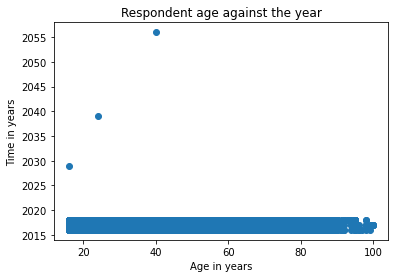

In [28]:
# We will use a scatter plot to find out the relationship between our numerical data, that is the year and the respondent age

plt.scatter(finance1['Respondent_Age'], finance1['Year'])

plt.title('Respondent age against the year')

plt.xlabel('Age in years')

plt.ylabel('Time in years')

plt.show()

In [29]:
# Finding the correlation between the household sizes and the respondent's age

finance1['Household_Size'].corr(finance1['Respondent_Age'])



-0.11970919507762415

In [30]:
# Finding the correlation between household size and the year of account creation

finance1['Year'].corr(finance1['Household_Size'])

-0.048901996192637645

In [31]:
# Finding the correlation between respondent age and year of creation

finance1['Respondent_Age'].corr(finance1['Year'])

-0.0190618449776902

In [50]:
# Transform categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
finance1['Cell_Phone_Access'] = Encoder.fit_transform(finance1['Cell_Phone_Access'])
finance1['Household_Size'] = Encoder.fit_transform(finance1['Household_Size'])
finance1['Type_of_Location'] = Encoder.fit_transform(finance1['Type_of_Location'])
finance1['Respondent_Gender'] = Encoder.fit_transform(finance1['Respondent_Gender'])
finance1['Has_A_Bank_Account'] = Encoder.fit_transform(finance1['Has_A_Bank_Account'])
finance1['Country'] = Encoder.fit_transform(finance1['Country'])
finance1['UniqueID'] = Encoder.fit_transform(finance1['UniqueID'])

finance1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Country,Year,UniqueID,Has_A_Bank_Account,Type_of_Location,Cell_Phone_Access,Household_Size,Respondent_Age,Respondent_Gender,Relationship_with_head,Marital_Status,Education_Level,Job_Level
0,0,2018,0,1,0,1,3,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,0,2018,1111,0,0,0,5,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,0,2018,2222,1,1,1,5,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,0,2018,3333,0,0,1,5,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,0,2018,4444,0,1,0,8,26.0,1,Child,Single/Never Married,Primary education,Informally employed


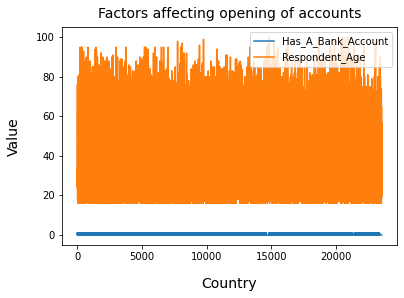

In [33]:
# Finding the relationship between location type, ownership of accounts and cell phone access by age

finance1[['Has_A_Bank_Account', 'Respondent_Age']].plot(kind='line')

plt.title("Factors affecting opening of accounts", fontsize=14, y=1.015)

plt.ylabel("Value", fontsize=14, labelpad=15)

plt.xlabel("Country", fontsize=14, labelpad=15)

plt.xticks(rotation = 0)

plt.show()



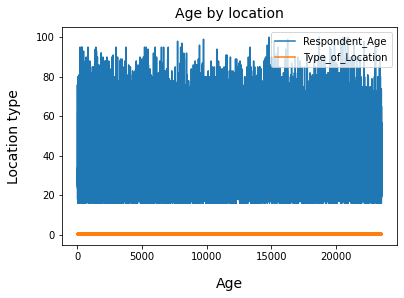

In [34]:
# Finding the relationship between the respondents age and their location
finance1[['Respondent_Age', 'Type_of_Location']].plot()

plt.title("Age by location", fontsize=14, y=1.015)

plt.ylabel("Location type", fontsize=14, labelpad=15)

plt.xlabel("Age", fontsize=14, labelpad=15)

plt.show()




# 3.0 Multi variate analysis

## Defining the question 

### Specifying the Data Analytic Question

> In which country are individuals expected to have access to more financial inclusion and under what factors

## Reading the Data

In [56]:
# Previewing our dataset

finance1.head()

,Country,Year,UniqueID,Has_A_Bank_Account,Type_of_Location,Cell_Phone_Access,Household_Size,Respondent_Age,Respondent_Gender,Relationship_with_head,Marital_Status,Education_Level,Job_Level
0,0,2018,0,1,0,1,3,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,0,2018,1111,0,0,0,5,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,0,2018,2222,1,1,1,5,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,0,2018,3333,0,0,1,5,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,0,2018,4444,0,1,0,8,26.0,1,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Preprocessing our data

X = finance1.drop('Respondent_Gender', 1)
y = finance1['Respondent_Gender']

In [0]:
# Splitting into test and training sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
# Normalisation

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: ignored